## *Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')

## *Load Data*

In [ ]:
insurance = pd.read_csv('/content/drive/MyDrive/Datasets/insurance.csv')

## *Preprocesing Data*

In [ ]:
def preprocesing(dataframe):

  dataframe['sex'] = np.where(dataframe.sex == 'male',1,0)
  df['smoker'] = np.where(df.smoker == 'yes',1,0)
  df = pd.get_dummies(df,prefix="",prefix_sep="")

  return df

In [ ]:
isnurance = preprocesing(insurance)

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## *Split Data*

In [ ]:
def datatset(df):

  X = df.drop(columns=['charges']).values
  y = df.charges.values

  return X,y

X,y = datatset(insurance)

In [1]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.3,
                                                 random_state = 42)

## *Linear Regression*

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression(normalize=True).fit(X_train,y_train)

In [ ]:
r2_train = lm.score(X_train,y_train)
r2_test = lm.score(X_test,y_test)

In [ ]:
print(f'R2 Train: {r2_train}')
print(f'R2 Test: {r2_test}')

R2 Train: 0.7420175540949394
R2 Test: 0.7698872289197194


We obtain two acceptable determination coefficients, however we can still improve the performance of the statistical models, for example creating an auxiliary variable.

In [ ]:
insurance = pd.read_csv('/content/drive/MyDrive/Datasets/insurance.csv')

In [ ]:
smoker_no_split = insurance.query("smoker == 'no'")
smoker_yes_split = insurance.query("smoker == 'yes'")

## *Creating New Variable*

Creating additional new variables can help the model to increase the statistical power of the model.

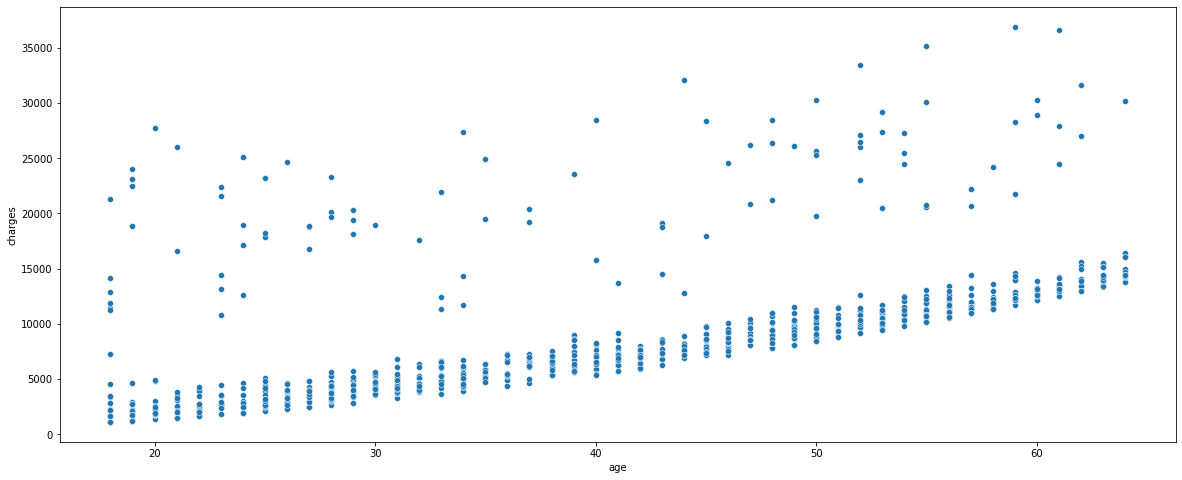

In [ ]:
fig = plt.subplots(1,1,figsize = (20,8))
_ = sns.scatterplot(data = smoker_no_split,x = "age",y = "charges")

In [ ]:
smoker_no_split['medical_problem'] = smoker_no_split["charges"] \
.apply(lambda x: "severe" if x>17000 else "light")

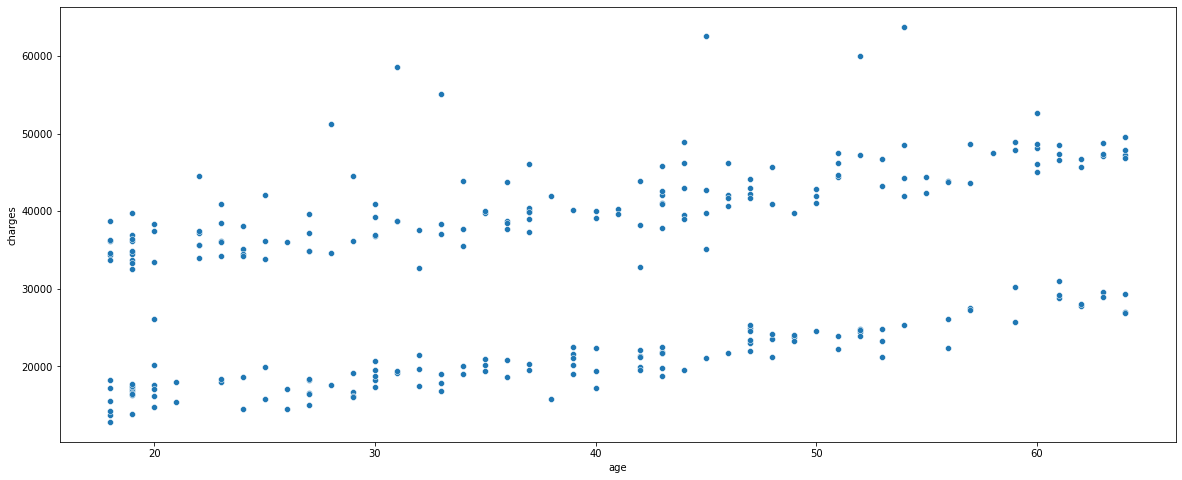

In [ ]:
fig = plt.subplots(1,1,figsize = (20,8))
_ = sns.scatterplot(data = smoker_yes_split,x = "age",y = "charges")

In [ ]:
smoker_yes_split["medical_problem"]=smoker_yes_split["charges"] \
.apply(lambda x: "severe" if x > 32000 else "light")

In [ ]:
insurence_clear = pd.concat([smoker_no_split,smoker_yes_split])

In [ ]:
insurence_clear['medical_problem'] = np.where(insurence_clear.medical_problem=="severe",
                                              1,0)

In [ ]:
insurence_clear.corr()

,age,bmi,children,charges,medical_problem
age,1.000000,0.109272,0.042469,0.299008,0.029047
bmi,0.109272,1.000000,0.012759,0.198341,0.232053
children,0.042469,0.012759,1.000000,0.067998,0.023488
charges,0.299008,0.198341,0.067998,1.000000,0.834295
medical_problem,0.029047,0.232053,0.023488,0.834295,1.000000


## *Preprocesing Data*

In [ ]:
insurence_clear= preprocesing(insurence_clear)

## *Split Data*

In [ ]:
X,y = datatset(insurence_clear)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.3,
                                                 random_state = 42)

## *New Model*

In [ ]:
lm = LinearRegression(normalize=True).fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
r2_train = lm.score(X_train,y_train)
r2_test = lm.score(X_test,y_test)
cv = cross_val_score(lm,X_test,y_test,cv = 10).mean()

In [ ]:
print(f'R2 Train: {r2_train}')
print(f'R2 Test:  {r2_test}')
print(f'CV:  {cv}')

R2 Train: 0.9625668924681636
R2 Test:  0.9695162893326814
CV:  0.9638317493306989


With the creation of the variable, we observed a tremendous increase in the statistical power of the model, without the need to use a more complex model such as XGBoost or Random Forest.